## House Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding, cleaning and exploration
- Data Visualization
- Data preparation
- Model building and evaluation


### 1. Data understanding, cleaning and exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# Importing Required Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
houses = pd.read_csv("train.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houses.shape

(1460, 81)

In [4]:
# summary of the dataset: 1460 rows, 81 columns, some null values
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking the number of percentage having null values in the columns
houses[houses.columns[houses.isnull().any()]].isnull().sum() * 100 / houses.shape[0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [6]:
# droping the columns having more than 17% null values.
houses = houses.drop(['Id', 'Alley', 'LotFrontage', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
print(houses.shape)

(1460, 74)


In [7]:
houses[houses.columns[houses.isna().any()]].isnull().sum() * 100 / houses.shape[0]

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [8]:
#delete the rows which are having null values.
houses = houses.dropna(subset=['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'])
print(houses.shape)

(1338, 74)


In [9]:
houses[houses.columns[houses.isna().any()]].isnull().sum() * 100 / houses.shape[0]

Series([], dtype: float64)

In [10]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotArea        1338 non-null   int64  
 3   Street         1338 non-null   object 
 4   LotShape       1338 non-null   object 
 5   LandContour    1338 non-null   object 
 6   Utilities      1338 non-null   object 
 7   LotConfig      1338 non-null   object 
 8   LandSlope      1338 non-null   object 
 9   Neighborhood   1338 non-null   object 
 10  Condition1     1338 non-null   object 
 11  Condition2     1338 non-null   object 
 12  BldgType       1338 non-null   object 
 13  HouseStyle     1338 non-null   object 
 14  OverallQual    1338 non-null   int64  
 15  OverallCond    1338 non-null   int64  
 16  YearBuilt      1338 non-null   int64  
 17  YearRemodAdd   1338 non-null   int64  
 18  RoofStyl

In [11]:
houses.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,...,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,41.252576,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,...,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,...,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,...,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2. Data Visualization

In [15]:
houses_num = houses.select_dtypes(exclude=['object'])
houses_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,SoldYr
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,208500,2008-02-01
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,181500,2007-05-01
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,223500,2008-09-01
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,140000,2006-02-01
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,250000,2008-12-01


In [16]:
houses_num.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'SoldYr'],
      dtype='object')

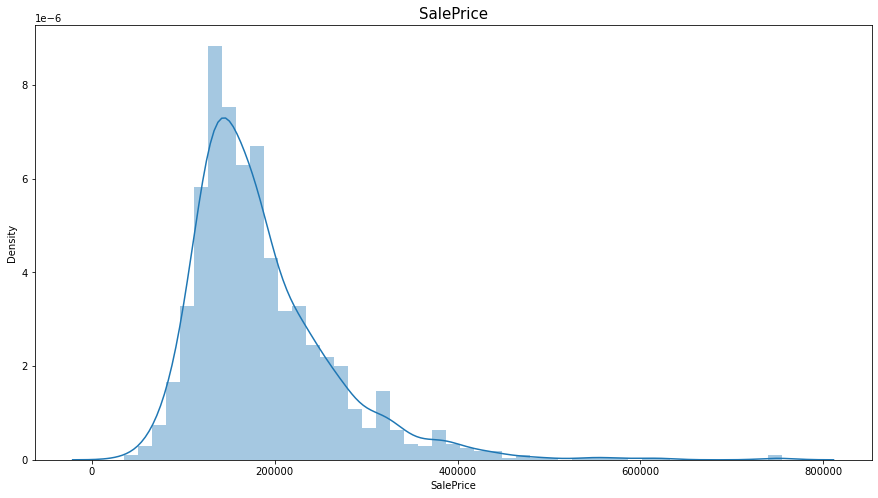

In [17]:
# drawing the plot
fig, ax = plt.subplots(figsize=(15, 8))

plt.title('SalePrice', fontsize=15)
sns.distplot(houses_num['SalePrice'], ax=ax)
plt.show()

In [18]:
# Correlation matrix
cor = houses_num.corr()
cor

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
MSSubClass,1.000000,-0.134158,0.051690,-0.098153,0.056456,0.038513,0.031333,-0.069053,-0.079329,-0.141025,...,0.006872,-0.070278,-0.010175,-0.000359,-0.022598,-0.041391,-0.022748,0.010199,-0.021512,-0.079599
LotArea,-0.134158,1.000000,0.090451,0.001415,-0.005022,0.001681,0.096727,0.210148,0.110493,-0.014589,...,0.138228,0.168630,0.167822,0.084942,-0.017968,0.019326,0.038489,0.077050,0.040824,0.254757
OverallQual,0.051690,0.090451,1.000000,-0.163080,0.570668,0.549460,0.401175,0.197441,-0.086014,0.292940,...,0.591878,0.530092,0.218570,0.307615,-0.116931,0.026470,0.045257,0.064570,-0.029351,0.783546
OverallCond,-0.098153,0.001415,-0.163080,1.000000,-0.417330,0.035076,-0.141080,-0.060068,0.035698,-0.161038,...,-0.249832,-0.204905,-0.012947,-0.060429,0.071473,0.023789,0.053759,-0.003544,0.077314,-0.108627
YearBuilt,0.056456,-0.005022,0.570668,-0.417330,1.000000,0.617156,0.299410,0.224264,-0.070403,0.147762,...,0.524076,0.443854,0.212296,0.216793,-0.385415,0.028982,-0.070809,0.001006,-0.033493,0.504297
YearRemodAdd,0.038513,0.001681,0.549460,0.035076,0.617156,1.000000,0.168311,0.099681,-0.085268,0.171881,...,0.459449,0.386213,0.201057,0.231129,-0.218452,0.039422,-0.052513,0.003354,-0.001379,0.501435
MasVnrArea,0.031333,0.096727,0.401175,-0.141080,0.299410,0.168311,1.000000,0.253015,-0.083303,0.104662,...,0.363916,0.367237,0.149182,0.129015,-0.112225,0.015221,0.052474,0.009334,-0.028975,0.465811
BsmtFinSF1,-0.069053,0.210148,0.197441,-0.060068,0.224264,0.099681,0.253015,1.000000,-0.064855,-0.552809,...,0.197559,0.284095,0.187178,0.107561,-0.105669,0.026811,0.051906,0.142708,0.007869,0.359677
BsmtFinSF2,-0.079329,0.110493,-0.086014,0.035698,-0.070403,-0.085268,-0.083303,-0.064855,1.000000,-0.233449,...,-0.080264,-0.053411,0.061206,0.004211,0.045668,-0.031475,0.085865,0.041148,0.006246,-0.031226
BsmtUnfSF,-0.141025,-0.014589,0.292940,-0.161038,0.147762,0.171881,0.104662,-0.552809,-0.233449,1.000000,...,0.242278,0.195401,-0.020711,0.122171,-0.003372,0.023701,-0.023065,-0.039315,-0.018566,0.191689


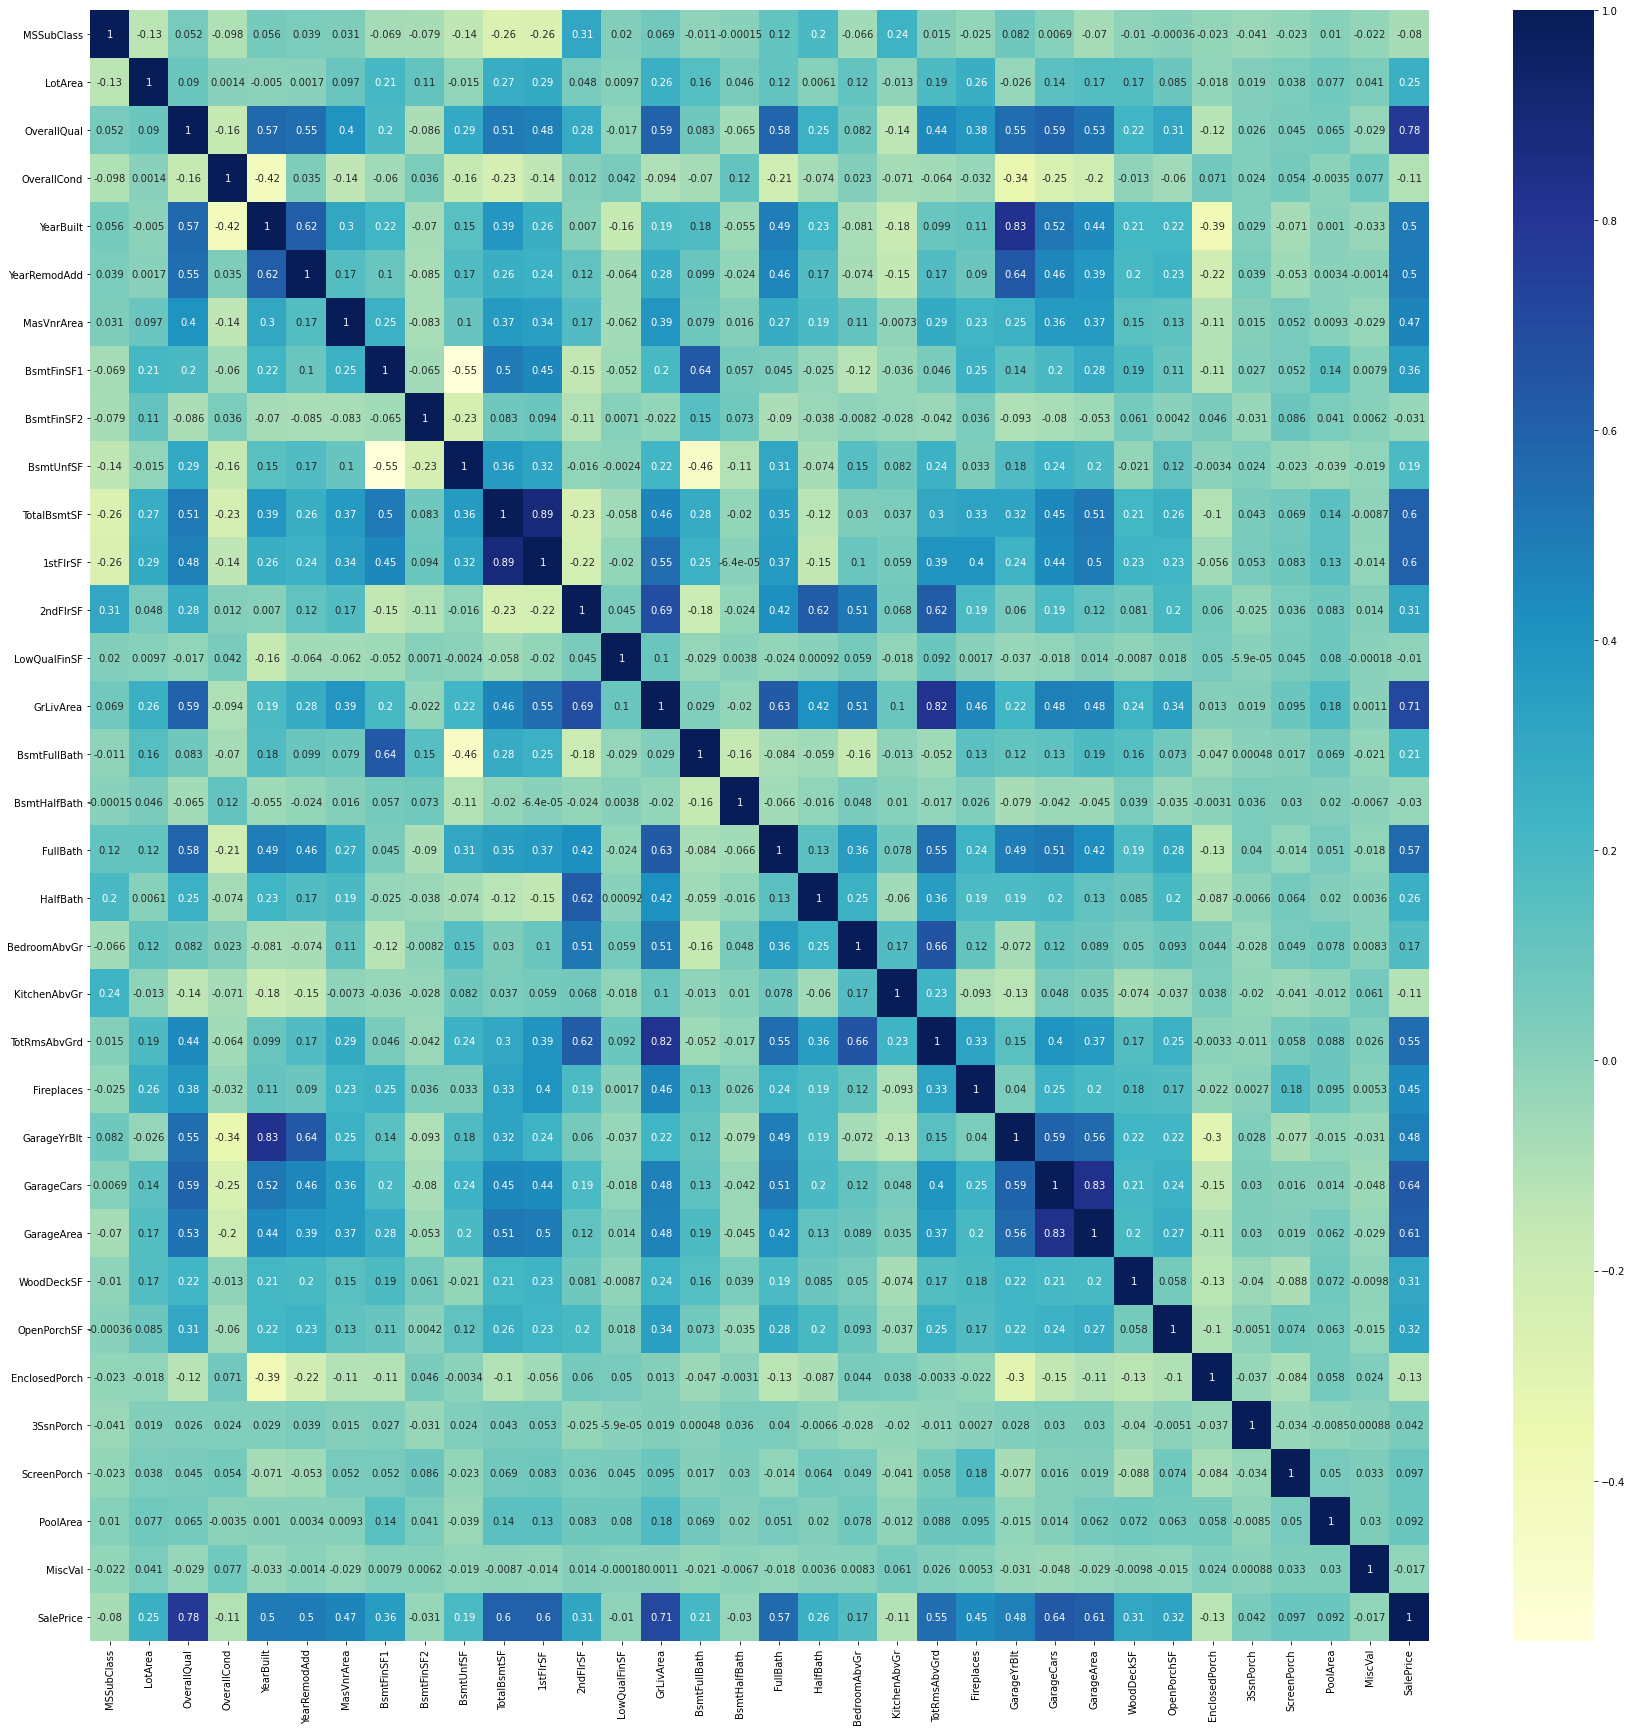

In [19]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

In [20]:
# Selecting highly correlated values with SalePrice
cols = ['LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','BsmtFinSF1','TotalBsmtSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']
houses_num = houses[cols]
houses_num.head()


,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,8450,7,5,2003,196.0,706,856,1710,2,8,0,2,548,0,61,208500
1,9600,6,8,1976,0.0,978,1262,1262,2,6,1,2,460,298,0,181500
2,11250,7,5,2001,162.0,486,920,1786,2,6,1,2,608,0,42,223500
3,9550,7,5,1915,0.0,216,756,1717,1,7,1,3,642,0,35,140000
4,14260,8,5,2000,350.0,655,1145,2198,2,9,1,3,836,192,84,250000


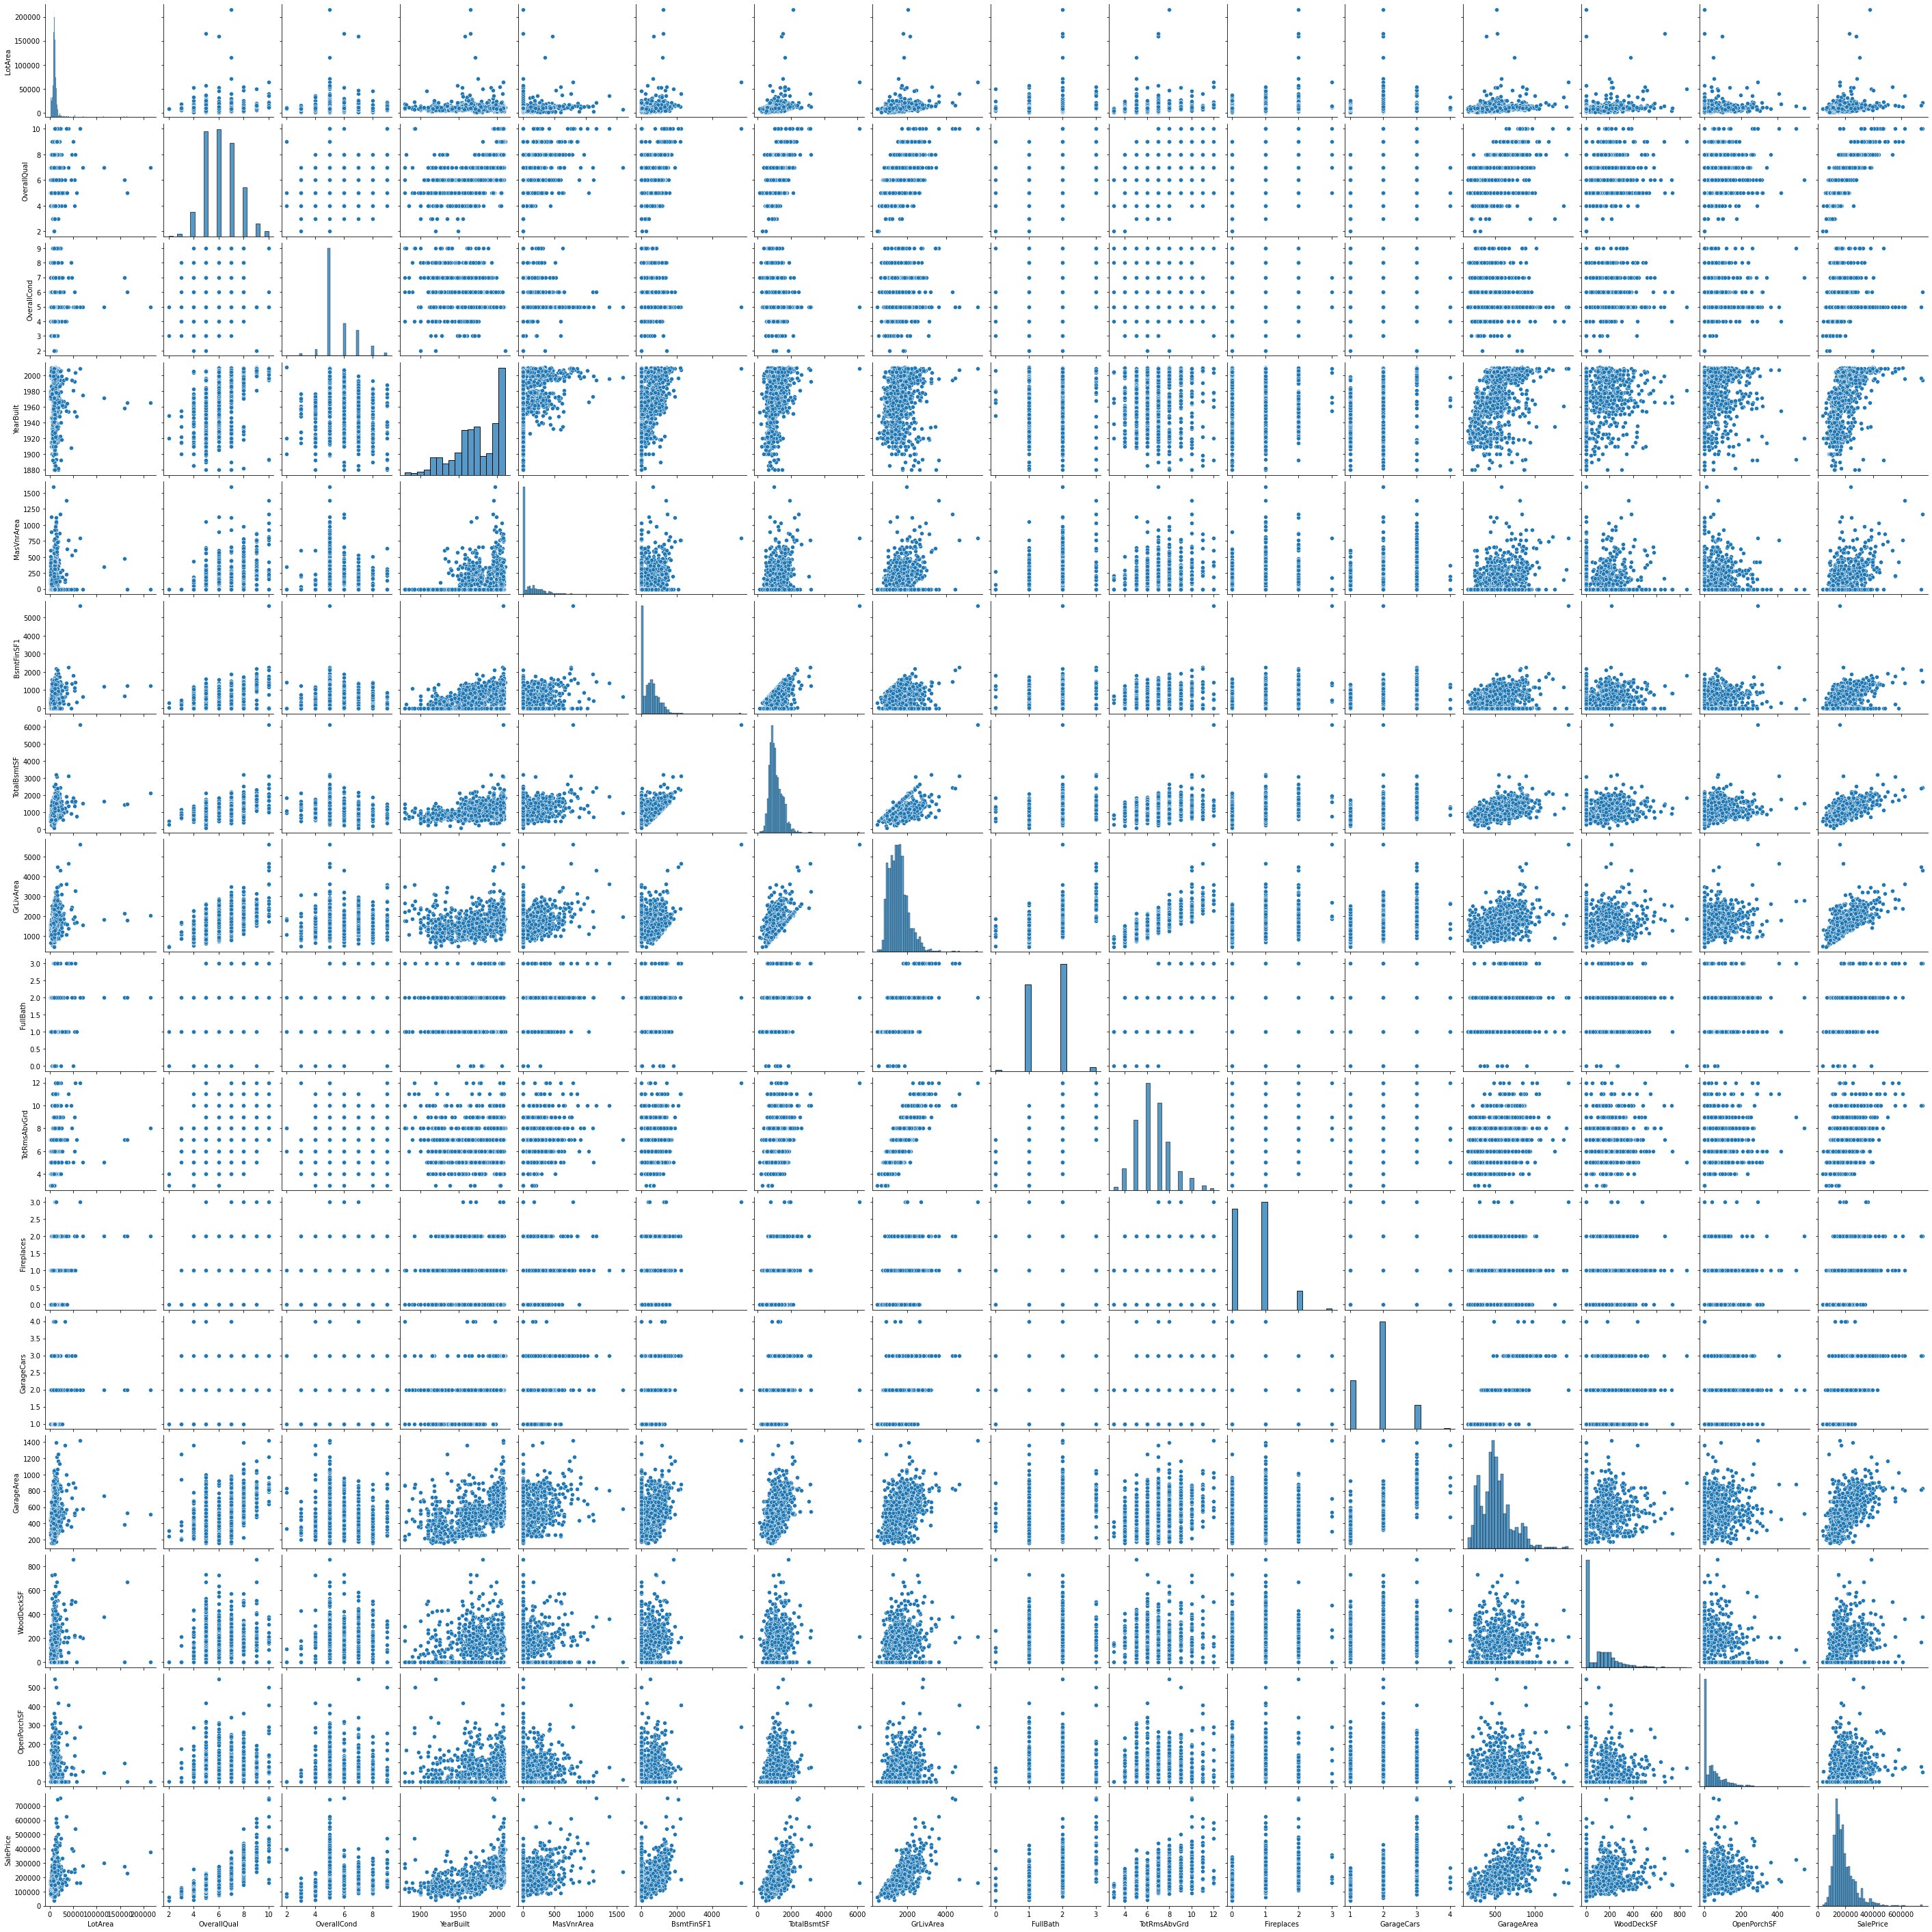

In [21]:
# Pairwise scatter plot
sns.pairplot(houses_num)
plt.show()

### 3. Data preparation

In [22]:
houses.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [24]:
# split into X and y
X = houses.loc[:, ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SaleType', 'SaleCondition']]

y = houses['SalePrice']

In [25]:
houses_cat = X.select_dtypes(include=['object'])
houses_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [26]:
# Convert into dummies
houses_cat_dummies = pd.get_dummies(houses_cat, drop_first=True)
houses_cat_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [27]:
# Drop categorical variable columns
X = X.drop(list(houses_cat.columns), axis=1)
X

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,2003.0,2,548,0,61,0,0,0,0,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,1976.0,2,460,298,0,0,0,0,0,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,2001.0,2,608,0,42,0,0,0,0,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,1998.0,3,642,0,35,272,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,2000.0,3,836,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,1999.0,2,460,0,40,0,0,0,0,0
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,1978.0,2,500,349,0,0,0,0,0,0
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,1941.0,1,252,0,60,0,0,0,0,2500
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,1950.0,1,240,366,0,112,0,0,0,0


In [28]:
# Concatenate dummy variables with the original dataframe
X = pd.concat([X, houses_cat_dummies], axis=1)

In [29]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=224)

In [30]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

###  4. Model Building and Evaluation

In [31]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-146094859786015.78
[-3.99602383e+03  5.64570317e+03  8.21023735e+03  6.94621667e+03
  1.19215165e+04  1.10473533e+03  4.12886791e+03  3.01884232e+15
  1.09356925e+15  2.89486316e+15 -2.66853775e+15  5.02087367e+14
  5.71794848e+14  5.28687602e+13 -6.76011926e+14 -3.63886391e+02
 -1.52191758e+00  7.26248221e+02  1.30705482e+02 -4.23818990e+03
 -1.87962421e+03  3.72939857e+03  1.12843948e+03 -4.42037943e+03
  1.17610846e+02  6.59117486e+03  8.65466583e+02 -3.81711329e+01
  1.21931576e+03  5.24184762e+02  5.66451825e+02  4.52151391e+03
 -7.96569814e+01  9.02564062e+03  3.12571875e+03  1.48184062e+04
  1.10462500e+04  2.20587500e+03  3.94562500e+02  4.79250000e+02
  2.57375000e+02  2.36115625e+03 -1.81107031e+03  3.04743750e+03
 -1.12537500e+03  1.63151562e+03 -1.99115625e+03 -1.99000000e+02
 -1.47762500e+03  6.32500000e+01 -3.00212500e+03  7.05312500e+01
  5.86000000e+02  6.78656250e+02  9.60000000e+01 -1.25725000e+03
  3.24834375e+03 -3.34837500e+03 -7.82500000e+02 -8.16406250e+01
 -7.4

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9315366343315108
-6.97075559881106e+21
397159776573.46875
1.751907460563257e+34
424316000.6126803
4.357978757620043e+31


#### Ridge and Lasso Regression

##### Ridge Regression

In [35]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [36]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [37]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.32703208e+03  4.59803691e+03  9.79218177e+03  5.35788515e+03
  4.88822132e+03  2.45720103e+03  5.52066076e+03  7.29269553e+03
  7.61696614e+02 -1.00160956e+03  7.47560843e+03  6.62349250e+03
  9.30200663e+03  7.17520588e+02  1.28434802e+04  1.20475145e+03
 -1.88938520e+02  2.74513387e+03  1.42279344e+03 -2.03590779e+03
 -2.82083368e+03  5.20946033e+03  2.11521690e+03 -7.80083770e+02
  1.98000469e+03  5.26773178e+03  1.49346282e+03  7.72276536e+02
  9.07166694e+02  7.55140220e+02  1.26602268e+03  4.74228054e+03
 -2.36573740e+01  1.50575672e+03 -3.47337651e+02  1.27208302e+03
 -3.17489542e+02  1.78748913e+03  1.19974611e+03  5.09457404e+02
 -4.23955999e+02  2.19652753e+03 -1.59481803e+03  2.31973383e+03
 -1.00702642e+03  1.82494903e+03 -1.67431120e+03 -4.00044242e+02
 -1.14670199e+03  4.52700959e+02 -2.11964169e+03 -4.23678901e+01
 -4.99915021e+00  7.31535783e+02 -1.92788440e+02 -6.96769480e+02
  3.18469811e+03 -2.37140903e+03 -1.08217920e+03 -6.93899525e+02
 -7.41295740e+02 -1.50538

In [38]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9221461094385406
0.7353293808888735
451634731638.61536
665176716698.7811
482515738.9301446
1654668449.4994555


##### Lasso Regression

In [39]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   15.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [41]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha = 500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [42]:
lasso.coef_

array([-4.95168959e+03,  4.83513358e+03,  1.17205376e+04,  5.99050011e+03,
        9.89554363e+03,  2.01652755e+03,  4.25992527e+03,  8.58379792e+03,
        3.67238304e+02, -0.00000000e+00,  6.60072307e+03,  0.00000000e+00,
        2.37690360e+03, -0.00000000e+00,  2.88375494e+04,  4.41354803e+02,
       -0.00000000e+00,  4.96563543e+00,  0.00000000e+00, -1.75211556e+03,
       -3.08022557e+03,  2.00812549e+03,  1.44442112e+03,  0.00000000e+00,
        0.00000000e+00,  6.26738427e+03,  6.10418894e+02,  0.00000000e+00,
        0.00000000e+00,  7.55186574e+01,  1.06072549e+03,  4.27160044e+03,
       -0.00000000e+00,  2.96804016e+02, -0.00000000e+00,  0.00000000e+00,
       -8.28049622e+02,  1.09026233e+03,  8.40077761e+02,  0.00000000e+00,
       -0.00000000e+00,  1.93626004e+03, -4.36792487e+02,  2.04539593e+03,
       -6.64292779e+02,  1.65810443e+03, -7.83983379e+02, -0.00000000e+00,
       -5.16892476e+02,  0.00000000e+00, -1.50616573e+03, -0.00000000e+00,
       -0.00000000e+00,  

In [43]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9195196254606535
0.7238703902848149
466871110680.8381
693975734029.4108
498793921.66756207
1726307796.0930617


In [44]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.315366e-01,9.221461e-01,9.195196e-01
1,R2 Score (Test),-6.970756e+21,7.353294e-01,7.238704e-01
2,RSS (Train),3.971598e+11,4.516347e+11,4.668711e+11
3,RSS (Test),1.751907e+34,6.651767e+11,6.939757e+11
4,MSE (Train),2.059893e+04,2.196624e+04,2.233369e+04
5,MSE (Test),6.601499e+15,4.067762e+04,4.154886e+04


## Lets observe the changes in the coefficients after regularization

In [45]:
betas = pd.DataFrame(index=X.columns)

In [46]:
betas.rows = X.columns

In [47]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [48]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
MSSubClass,-3.996024e+03,-3327.032082,-4951.689589
LotArea,5.645703e+03,4598.036910,4835.133577
OverallQual,8.210237e+03,9792.181773,11720.537552
OverallCond,6.946217e+03,5357.885152,5990.500112
YearBuilt,1.192152e+04,4888.221323,9895.543625
YearRemodAdd,1.104735e+03,2457.201033,2016.527551
MasVnrArea,4.128868e+03,5520.660761,4259.925267
BsmtFinSF1,3.018842e+15,7292.695530,8583.797925
BsmtFinSF2,1.093569e+15,761.696614,367.238304
BsmtUnfSF,2.894863e+15,-1001.609562,-0.000000
